This data set has was orginally downloaded from the Hass Avocado Board in 2018 as a compilied CSV and has since been cleaned. I am intrested in finding out what type of avocados are sold the most (ie size and organic vs non-organic). I am also curious to see if avocados are a seasonal produce or if they seem to not be affected by seasonalilty. 

Some relevant columns in the dataset:

Sale_ID= ID column, not relevant

Date - The date of the observation

AveragePrice - the average price of a single avocado, it makes no distinction by size

Total Avocados - calculated column= small+large+XL

Small 4046 - Total number of avocados with PLU 4046 sold (3-5oz avocado)

Large 4225 - Total number of avocados with PLU 4225 sold (8-10oz avocado)

XL 4770 - Total number of avocados with PLU 4770 sold (10-15oz avocado)

Total Bags - calculated column= small+large+XL (bags)

Small 4046 - Total number of avocados with PLU 4046 sold

Large 4225 - Total number of avocados with PLU 4225 sold

XL 4770 - Total number of avocados with PLU 4770 sold

Type - conventional or organic

Year - the year

City - the city of the observation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('avocado_clean.csv')

In [5]:
data.head()

,Sale ID,Date,AveragePrice,Total Avocados,Small 4046,Extra Large 4770,Large 4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Cities
0,1,2017-03-05 00:00:00,$0.44,4973,224,0,4749,59085,639,58446,0,organic,Cincinnati Dayton
1,1,2017-02-05 00:00:00,$0.46,1750185,1200633,18325,531227,450366,113752,330583,6031,conventional,Phoenix Tucson
2,1,2017-03-05 00:00:00,$0.48,4857,718,0,4139,46034,1385,44649,0,organic,Detroit
3,1,2017-02-26 00:00:00,$0.49,4726,253,0,4473,39299,600,38699,0,organic,Cincinnati Dayton
4,1,2015-12-27 00:00:00,$0.49,1036815,738315,11642,286858,100892,70749,30143,0,conventional,Phoenix Tucson


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14869 entries, 0 to 14868
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sale ID           14869 non-null  int64 
 1   Date              14869 non-null  object
 2   AveragePrice      14869 non-null  object
 3   Total Avocados    14869 non-null  int64 
 4   Small 4046        14869 non-null  int64 
 5   Extra Large 4770  14869 non-null  int64 
 6   Large 4225        14869 non-null  int64 
 7   Total Bags        14869 non-null  int64 
 8   Small Bags        14869 non-null  int64 
 9   Large Bags        14869 non-null  int64 
 10  XLarge Bags       14869 non-null  int64 
 11  type              14869 non-null  object
 12  Cities            14869 non-null  object
dtypes: int64(9), object(4)
memory usage: 1.5+ MB


In [7]:
data = data.drop(['Sale ID', 'Total Avocados', 'Total Bags'], axis=1)

In [8]:
data.rename(columns={'Extra Large 4770':'XLarge 4770', 'type':'Type'}, inplace=True)

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

Even though the data has no null vals there are few discrepencies I want to fix with the columns and dtypes.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14869 entries, 0 to 14868
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          14869 non-null  datetime64[ns]
 1   AveragePrice  14869 non-null  object        
 2   Small 4046    14869 non-null  int64         
 3   XLarge 4770   14869 non-null  int64         
 4   Large 4225    14869 non-null  int64         
 5   Small Bags    14869 non-null  int64         
 6   Large Bags    14869 non-null  int64         
 7   XLarge Bags   14869 non-null  int64         
 8   Type          14869 non-null  object        
 9   Cities        14869 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 1.1+ MB


In [12]:
data.duplicated().sum()

0

In [13]:
df = pd.DataFrame(data)

In [14]:
print(df['AveragePrice'].unique())

['$0.44' '$0.46' '$0.48' '$0.49' '$0.51' '$0.52' '$0.53' '$0.54' '$0.55'
 '$0.56' '$0.57' '$0.58' '$0.59' '$0.6' '$0.61' '$0.62' '$0.63' '$0.64'
 '$0.65' '$0.66' '$0.67' '$0.68' '$0.69' '$0.7' '$0.71' '$0.72' '$0.73'
 '$0.74' '$0.75' '$0.76' '$0.77' '$0.78' '$0.79' '$0.8' '$0.81' '$0.82'
 '$0.83' '$0.84' '$0.85' '$0.86' '$0.87' '$0.88' '$0.89' '$0.9' '$0.91'
 '$0.92' '$0.93' '$0.94' '$0.95' '$0.96' '$0.97' '$0.98' '$0.99' '$1'
 '$1.01' '$1.02' '$1.03' '$1.04' '$1.05' '$1.06' '$1.07' '$1.08' '$1.09'
 '$1.1' '$1.11' '$1.12' '$1.13' '$1.14' '$1.15' '$1.16' '$1.17' '$1.18'
 '$1.19' '$1.2' '$1.21' '$1.22' '$1.23' '$1.24' '$1.25' '$1.26' '$1.27'
 '$1.28' '$1.29' '$1.3' '$1.31' '$1.32' '$1.33' '$1.34' '$1.35' '$1.36'
 '$1.37' '$1.38' '$1.39' '$1.4' '$1.41' '$1.42' '$1.43' '$1.44' '$1.45'
 '$1.46' '$1.47' '$1.48' '$1.49' '$1.5' '$1.51' '$1.52' '$1.53' '$1.54'
 '$1.55' '$1.56' '$1.57' '$1.58' '$1.59' '$1.6' '$1.61' '$1.62' '$1.63'
 '$1.64' '$1.65' '$1.66' '$1.67' '$1.68' '$1.69' '$1.7' '$1.71' 

In [15]:
df['AveragePrice'] = df['AveragePrice'].str.replace(r'[^0-9.]', '', regex=True)
df['AveragePrice'] = pd.to_numeric(df['AveragePrice'], errors='coerce')

In [16]:
print(df['AveragePrice'].dtype)

float64


In [17]:
df['AveragePrice']

0        0.44
1        0.46
2        0.48
3        0.49
4        0.49
         ... 
14864    3.04
14865    3.05
14866    3.12
14867    3.17
14868    3.25
Name: AveragePrice, Length: 14869, dtype: float64

In [18]:
df['AveragePrice'].isna().sum()

0

Now that I feel confident with the data I first want to plot the 

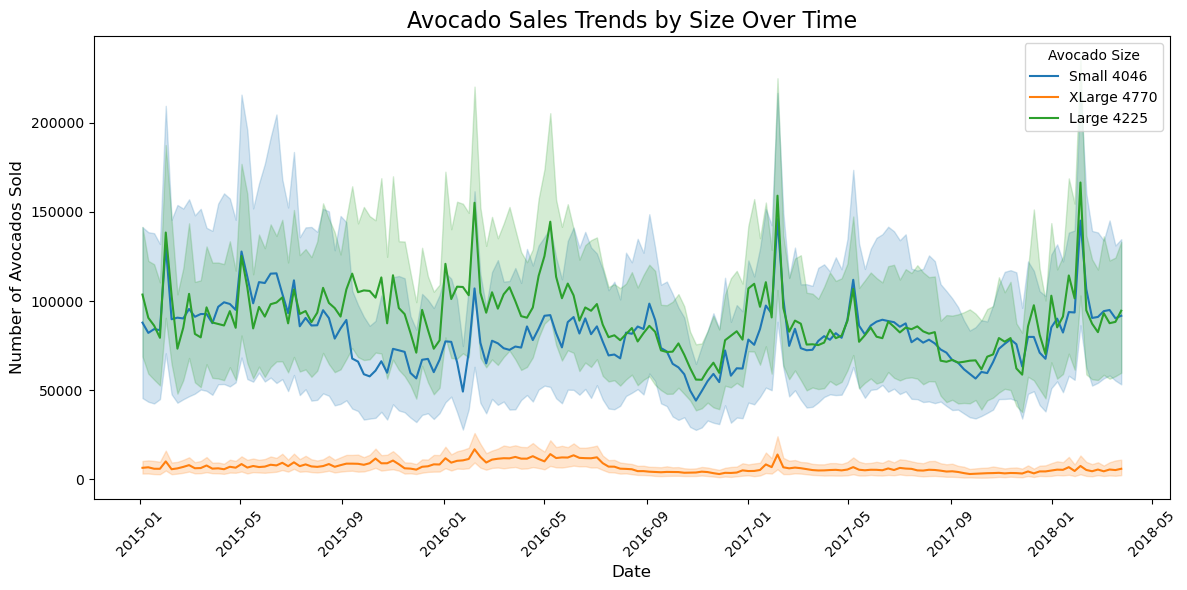

In [20]:
# Melt the DataFrame for plotting
df_melted = df.melt(id_vars='Date', 
                    value_vars=['Small 4046', 'XLarge 4770', 'Large 4225'],
                    var_name='Size', 
                    value_name='Sold')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Date', y='Sold', hue='Size')
plt.title('Avocado Sales Trends by Size Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Avocados Sold', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Avocado Size')
plt.tight_layout()
plt.show()

Pretty intresting that XLarge Avocados are stable throughout the years and are the least purchased although there are some spikes in XLarge that seem to follow the same spikes in the other sized avocados. All sizes of avocados seem to spike in January and May each year possibly inferring that avocados are somewhat affected by seasonality, but not the type that nature impacts. According to some research Hass avocados are in season from January to October but why are we seeing spikes in January and May?

Let's take a look at sales in May of each year to see if that tells us anything.

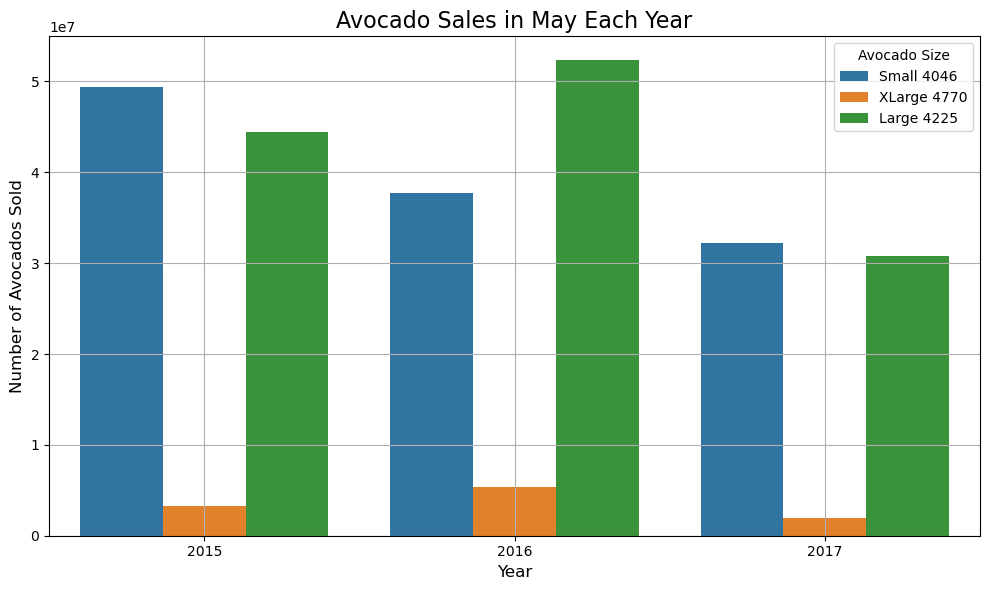

In [23]:
# Filter for May data
df['Year'] = df['Date'].dt.year  # Extract year
df['Month'] = df['Date'].dt.month  # Extract month
may_data = df[df['Month'] == 5]

# Group by year and sum avocado sales for May
may_grouped = may_data.groupby('Year')[['Small 4046', 'XLarge 4770', 'Large 4225']].sum().reset_index()

# Melt the data for easier plotting
may_melted = may_grouped.melt(id_vars='Year', var_name='Size', value_name='Sold')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=may_melted, x='Year', y='Sold', hue='Size')
plt.title('Avocado Sales in May Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Avocados Sold', fontsize=12)
plt.legend(title='Avocado Size')
plt.grid(True)
plt.tight_layout()
plt.show()

Let's look at January sales for each year

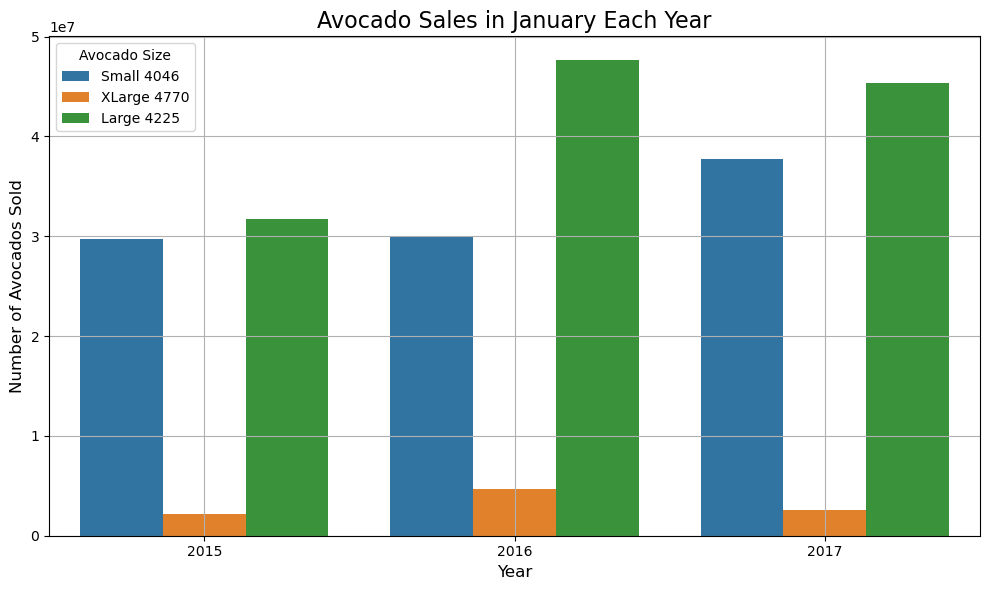

In [25]:
# Filter for May data
df['Year'] = df['Date'].dt.year  # Extract year
df['Month'] = df['Date'].dt.month  # Extract month
jan_data = df[df['Month'] == 1]

# Group by year and sum avocado sales for May
jan_grouped = jan_data.groupby('Year')[['Small 4046', 'XLarge 4770', 'Large 4225']].sum().reset_index()

# Remove 2018 from the data since May did not have 2018 data
jan_grouped = jan_grouped[jan_grouped['Year'] != 2018]

# Melt the data for easier plotting
jan_melted = jan_grouped.melt(id_vars='Year', var_name='Size', value_name='Sold')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=jan_melted, x='Year', y='Sold', hue='Size')
plt.title('Avocado Sales in January Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Avocados Sold', fontsize=12)
plt.legend(title='Avocado Size')
plt.grid(True)
plt.tight_layout()
plt.show()

Okay so we can see that over the years the number of avocados sold trend upwards and are just slightly higher in sales year after year compared to sales in May year after year (exluding 2015). Is it so high in January because it is not only in season but with the new year comes in the diet culture? Is it because after the holidays of indulgence in creams and sugars avocados are the refreshing saving grace we are all looking for.

Lastly, I am interested to know are more people buying organic vs non-organic. According to Fox Business, avocados are one of the produce they consider fine to buy non-organic as they are considered one of the "clean" foods that contain the least pesticides and due to the fact that the hard skin is not consumed. 

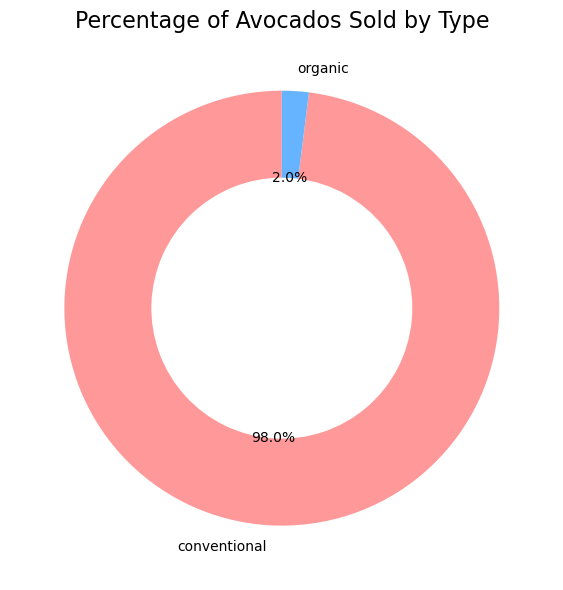

In [28]:
# Calculate total avocados sold 
df['Total_Sold'] = df['Small 4046'] + df['XLarge 4770'] + df['Large 4225']

# Calculate total avocados sold by type
type_grouped = df.groupby('Type')['Total_Sold'].sum()

# Plot a donut chart
plt.figure(figsize=(8, 6))
type_grouped.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4}, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Avocados Sold by Type', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

Wow, only 2% of avocados sold are organic! It seems hardly worth selling organic with such little product sold. Let's look at the average price of organic vs. conventional sold to see if that helps explain why organic is still an option.

/var/folders/r0/3ty1gxbn02q24zg2crgysbm40000gn/T/ipykernel_38254/3742358247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='AveragePrice', palette='Set2')


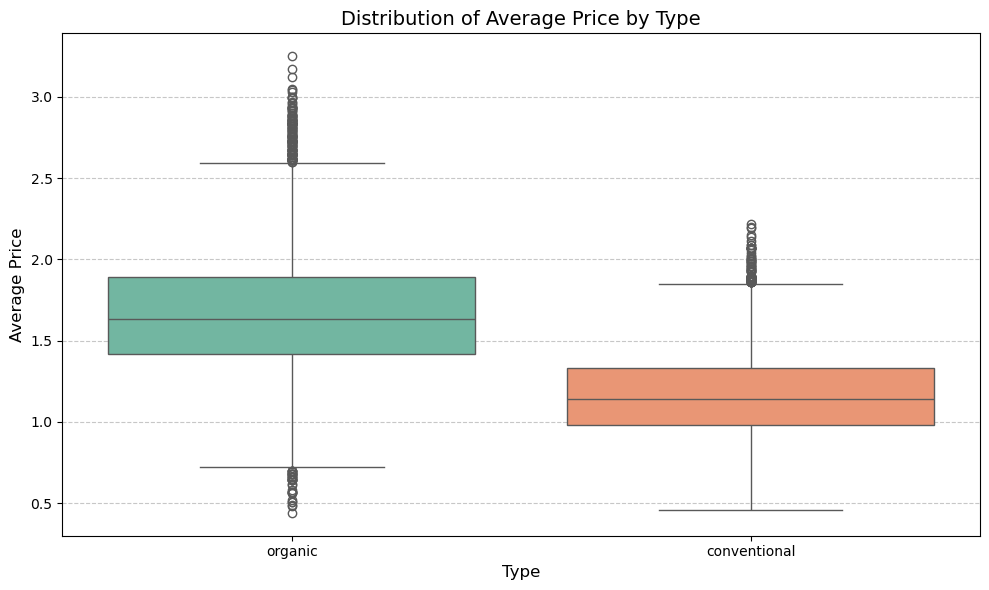

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type', y='AveragePrice', palette='Set2')

# Add titles and labels
plt.title('Distribution of Average Price by Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()